In [14]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


In [15]:
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [16]:
df = pd.read_csv('Wine-quality-challenge.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Normal distribution

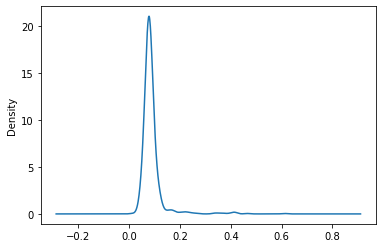

In [17]:
#Density plot of Chlorides
df.chlorides.plot.density()

In [18]:
#check the # of observations within x standard deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std())
      & (df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std())].chlorides.count() / df.chlorides.count()

0.9480925578486554

In [19]:
df.loc[(df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std())
      & (df.chlorides >= df.chlorides.mean() - 2 * df.chlorides.std())].chlorides.count() / df.chlorides.count()

0.9718574108818011

In [20]:
df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std())
      & (df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std())].chlorides.count() / df.chlorides.count()

0.9806128830519074

In [21]:
# question: what if the share of observations within 3 standard deviations of alcohol
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count() / df.alcohol.count()

0.9949968730456535

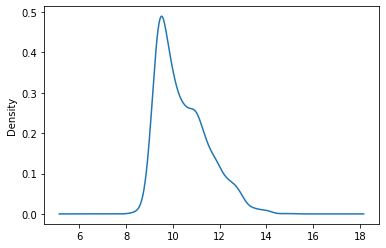

In [22]:
df.alcohol.plot.density()

#shapiro-Wilks test

In [26]:
# for test if data is normally distributed
stat, p = st.shapiro(df.chlorides)

#condition
if p > 0.05:
  print(f'p is {p}, sample looks Normal (fail to reject H0)')
else:
  print(f'p is {p}, sample does not look Normal (reject H0)')

p is 0.0, sample does not look Normal (reject H0)


In [28]:
#Shapiro Wilks test for Sulphates
stats, p = st.shapiro(df.sulphates)
if p > 0.05:
  print(f'p is {p}, sample looks Normal (fail to reject H0)')
else:
  print(f'p is {p}, sample does not look Normal (reject H0)')

p is 5.821617678881608e-38, sample does not look Normal (reject H0)


#standard error

In [29]:
#using a function
st.sem(df.alcohol)

0.026650018979018173

In [31]:
#standard deviations divided by square root of observation
print(df.alcohol.std())
print(m.sqrt(df.alcohol.count()))
df.alcohol.std() / m.sqrt(df.alcohol.count())

1.0656675818563988
39.98749804626441


0.026650018979018173

In [32]:
#standard error of pH
st.sem(df.pH)

0.0038608683325203784

In [33]:
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784

#Confidence interval

In [35]:
#Confidence interval of the mean of Cirtric Acid
print(df['citric acid'].mean())
st.norm.interval(alpha=0.95, loc=df['citric acid'].mean(),
                 scale = st.sem(df['citric acid']))

0.2709756097560976


(0.2614275451830121, 0.28052367432918307)

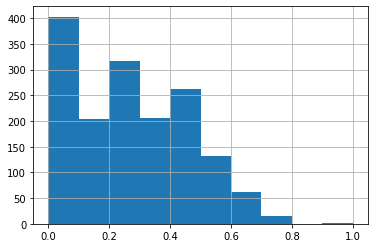

In [36]:
# histogram
df['citric acid'].hist()

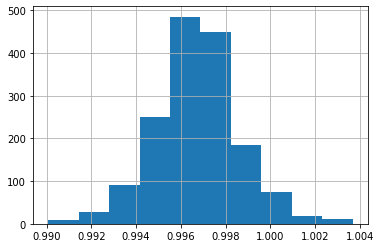

In [37]:
#Confidence interval of the Density mean
df.density.hist()

In [40]:
print(df.density.mean())
st.norm.interval(alpha=0.95,
                 loc = df.density.mean(),
                 scale = st.sem(df.density))

0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

# T-test

In [41]:
data = pd.read_csv('stackoverflow.csv')
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
print(data.loc[(data.Country == 'United Kingdom')].Salary.mean())
data.loc[(data.Country == 'Germany')].Salary.mean()

54657.603564094825


52255.00916170145

In [44]:
# subset
salary_uk = data.loc[(data.Country == 'United Kingdom')].Salary
salary_de = data.loc[(data.Country == 'Germany')].Salary

In [46]:
# T-test
stat, p = st.ttest_ind(salary_uk, salary_de)
print(p)
if p > 0.05:
  print('both country has similar salaries (fail to reject H0)')
else:
  print('there is difference in salary, reject H0')

0.026389999555203502
there is difference


In [51]:
# T-test in experience between USA and India
exp_usa = data.loc[data.Country == 'United States'].YearsCodedJob
exp_ind = data.loc[data.Country == 'India'].YearsCodedJob

stat, p = st.ttest_ind(exp_usa, exp_ind)
print(p)
if p > 0.05:
  print('there is similarity of expirience in USA and India')
else:
  print('there is no similarity')

5.225676347614714e-58
there is no similarity


> Chi-square test is for categorical dataset, while T-test is for continuous data set

#Chi-square test

In [52]:
#cross tabulation
tab = pd.crosstab(index = data.Country, columns=data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [55]:
# chi square test
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)
if p > 0.05:
  print('there is no relationship')
else:
  print('there is strong relationship')

3.321120877301216e-16
there is strong relationship


In [63]:
# chi square test between company size and hobbies
# tab2 = pd.crosstab(index=data.CompanySizeNumber, columns=data.Hobby)
tab2 = pd.crosstab(index=data.Hobby, columns=data.CompanySizeNumber)
tab2

CompanySizeNumber,1,10,20,100,500,1000,5000,10000
Hobby,,,,,,,,
0,101,123,293,245,91,180,60,243
1,311,400,961,918,309,436,192,731


In [64]:
chi2, p, dof, exp = st.chi2_contingency(tab2)
print(p)
if p > 0.05:
  print('there is no relationship')
else:
  print('there is strong relationship')

0.025708455559671013
there is strong relationship
